In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip '/content/drive/MyDrive/Dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8914e04-4e33-4189-bfa9-f547e5f696d1___GCREC_Bact.Sp 3173.JPG  
  inflating: Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8a64b79-e21e-4158-9d9d-47bd6e44fba0___GCREC_Bact.Sp 3594.JPG  
  inflating: Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8a90b81-eb30-461d-80ba-4fa9c93f379d___GCREC_Bact.Sp 3757.JPG  
  inflating: Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8b6f17a-5189-47ae-904f-be4a09dce0ad___UF.GRC_BS_Lab Leaf 9009.JPG  
  inflating: Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8d2baf6-87de-43e5-bd40-48dfe33841d3___GCREC_Bact.Sp 5747.JPG  
  inflating: Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8d3c759-4242-42c0-9be5-b3177f2664be___GCREC_Bact.Sp 5953.JPG  
  

In [4]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [5]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [6]:
x_train=train_datagen.flow_from_directory(r"/content/Dataset_Plant_Disease/fruit-dataset/fruit-dataset/train",target_size=(128,128),class_mode='categorical',batch_size=24)

Found 5384 images belonging to 6 classes.


In [7]:
x_test=test_datagen.flow_from_directory(r"/content/Dataset_Plant_Disease/fruit-dataset/fruit-dataset/test",target_size=(128,128),class_mode='categorical',batch_size=24)

Found 1686 images belonging to 6 classes.


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [9]:
model=Sequential()

In [10]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [11]:
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [12]:
32*(3*3*3+1)
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [13]:
model.add(Dense(6,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
len(x_train)

225

In [14]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
225/225 [==============================] - 160s 705ms/step - loss: 0.9940 - accuracy: 0.7955 - val_loss: 0.4836 - val_accuracy: 0.8304
Epoch 2/10
225/225 [==============================] - 156s 692ms/step - loss: 0.2312 - accuracy: 0.9170 - val_loss: 0.2437 - val_accuracy: 0.9087
Epoch 3/10
225/225 [==============================] - 155s 689ms/step - loss: 0.1871 - accuracy: 0.9376 - val_loss: 0.2194 - val_accuracy: 0.9205
Epoch 4/10
225/225 [==============================] - 155s 687ms/step - loss: 0.1795 - accuracy: 0.9378 - val_loss: 0.3400 - val_accuracy: 0.8980
Epoch 5/10
225/225 [==============================] - 157s 698ms/step - loss: 0.1331 - accuracy: 0.9539 - val_loss: 0.2724 - val_accuracy: 0.9152
Epoch 6/10
225/225 [==============================] - 154s 685ms/step - loss: 0.1081 - accuracy: 0.9608 - val_loss: 0.0988 - val_accuracy: 0.9698
Epoch 7/10
225/225 [==============================] - 155s 689ms/step - loss: 0.1152 - accuracy: 0.9582 - val_loss: 0.1500 -

In [15]:
model.save('fruitdata.h5')

In [16]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [17]:
model=load_model('fruitdata.h5')

In [18]:
img=image.load_img(r"/content/Dataset_Plant_Disease/fruit-dataset/fruit-dataset/test/Peach___healthy/5a40aaba-8352-4bd0-bfec-b9fcf89a891b___Rutg._HL 3612.JPG")

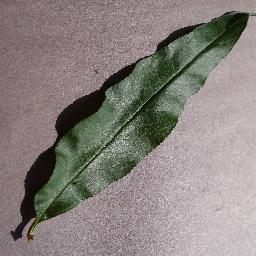

In [19]:
img

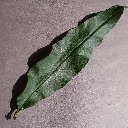

In [20]:
img=image.load_img(r"/content/Dataset_Plant_Disease/fruit-dataset/fruit-dataset/test/Peach___healthy/5a40aaba-8352-4bd0-bfec-b9fcf89a891b___Rutg._HL 3612.JPG",target_size=(128,128))
img

In [21]:
x=image.img_to_array(img)

In [22]:
x

array([[[116.,  97., 101.],
        [110.,  91.,  95.],
        [116.,  97., 101.],
        ...,
        [155., 143., 143.],
        [156., 144., 144.],
        [166., 154., 154.]],

       [[126., 107., 111.],
        [120., 101., 105.],
        [110.,  91.,  95.],
        ...,
        [161., 147., 147.],
        [160., 146., 146.],
        [162., 148., 148.]],

       [[119., 100., 104.],
        [122., 103., 107.],
        [128., 109., 113.],
        ...,
        [157., 143., 142.],
        [166., 152., 151.],
        [167., 153., 152.]],

       ...,

       [[129., 114., 119.],
        [132., 117., 122.],
        [127., 112., 117.],
        ...,
        [204., 198., 200.],
        [207., 201., 203.],
        [207., 201., 203.]],

       [[134., 119., 124.],
        [132., 117., 122.],
        [128., 113., 118.],
        ...,
        [202., 196., 198.],
        [218., 212., 214.],
        [201., 195., 197.]],

       [[145., 130., 135.],
        [119., 104., 109.],
        [145., 1

In [23]:
x=np.expand_dims(x,axis=0)

In [24]:
x

array([[[[116.,  97., 101.],
         [110.,  91.,  95.],
         [116.,  97., 101.],
         ...,
         [155., 143., 143.],
         [156., 144., 144.],
         [166., 154., 154.]],

        [[126., 107., 111.],
         [120., 101., 105.],
         [110.,  91.,  95.],
         ...,
         [161., 147., 147.],
         [160., 146., 146.],
         [162., 148., 148.]],

        [[119., 100., 104.],
         [122., 103., 107.],
         [128., 109., 113.],
         ...,
         [157., 143., 142.],
         [166., 152., 151.],
         [167., 153., 152.]],

        ...,

        [[129., 114., 119.],
         [132., 117., 122.],
         [127., 112., 117.],
         ...,
         [204., 198., 200.],
         [207., 201., 203.],
         [207., 201., 203.]],

        [[134., 119., 124.],
         [132., 117., 122.],
         [128., 113., 118.],
         ...,
         [202., 196., 198.],
         [218., 212., 214.],
         [201., 195., 197.]],

        [[145., 130., 135.],
       

In [25]:
x

array([[[[116.,  97., 101.],
         [110.,  91.,  95.],
         [116.,  97., 101.],
         ...,
         [155., 143., 143.],
         [156., 144., 144.],
         [166., 154., 154.]],

        [[126., 107., 111.],
         [120., 101., 105.],
         [110.,  91.,  95.],
         ...,
         [161., 147., 147.],
         [160., 146., 146.],
         [162., 148., 148.]],

        [[119., 100., 104.],
         [122., 103., 107.],
         [128., 109., 113.],
         ...,
         [157., 143., 142.],
         [166., 152., 151.],
         [167., 153., 152.]],

        ...,

        [[129., 114., 119.],
         [132., 117., 122.],
         [127., 112., 117.],
         ...,
         [204., 198., 200.],
         [207., 201., 203.],
         [207., 201., 203.]],

        [[134., 119., 124.],
         [132., 117., 122.],
         [128., 113., 118.],
         ...,
         [202., 196., 198.],
         [218., 212., 214.],
         [201., 195., 197.]],

        [[145., 130., 135.],
       

In [26]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 143ms/step


In [27]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [35]:
index=['Apple___Black_rot','Peach___healthy','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Peach___Bacterial_spot','Apple___healthy']

In [36]:
index[y[0]]

'Peach___healthy'

In [37]:
img=image.load_img(r"/content/Dataset_Plant_Disease/fruit-dataset/fruit-dataset/test/Peach___healthy/5a40aaba-8352-4bd0-bfec-b9fcf89a891b___Rutg._HL 3612.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Apple___Black_rot','Peach___healthy','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Peach___Bacterial_spot','Apple___healthy']
index[y[0]]

1/1 [==============================] - 0s 42ms/step


'Peach___healthy'